# Machine Learning: A Quantitative Approach

The goal of this lab is to look at how many samples it takes to to train a machine learning model using the R2 metric to indicate overall performance of the model.

In [1]:
%matplotlib inline

In [2]:
import sys, csv
import time

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
from collections import Counter
import seaborn as sns

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Common

In [6]:
def reshape_data(my_data, features):
    X_sorted = my_data.sort_values(by=features)
    X_grouped_by_mean = pd.DataFrame({'mean' : \
                                     X_sorted.groupby(features[0])[features[1]].mean()}).reset_index()
    
    X_reshaped = X_grouped_by_mean[features[0]].values.reshape(-1, 1)
    y_reshaped = X_grouped_by_mean['mean'].values.reshape(-1, 1)
    
    return X_reshaped, y_reshaped

In [7]:
def split_data(my_data, test_size):
    test_set = my_data.sample(frac=test_size, replace=True)
    train_set = my_data.sample(frac=(1 - test_size), replace=True)
    
    return train_set, test_set

### Dataset

In [8]:
vehicles_df = pd.read_csv("datasets/vehicles_processed_mean.csv", low_memory = False)

In [9]:
train_set_all, test_set = split_data(vehicles_df, test_size = .3)

In [10]:
print("train size: %d" % len(train_set_all))
print("test size: %d" % len(test_set))

train size: 46
test size: 20


In [11]:
features = ['displ', 'mean']
test_set_x, test_set_y = reshape_data(test_set, features)

In [12]:
poly_features = PolynomialFeatures(degree = 2)
test_set_x_poly = poly_features.fit_transform(test_set_x)

In [13]:
x, train_rmse, test_rmse = [], [], []

In [14]:
def gen_test():
    for n in range(1, len(train_set_all), 1):
        x.append(n)
        train_set = train_set_all.sample(n = n, replace = False)
        train_set_x, train_set_y = reshape_data(train_set, features)

        train_set_x_poly = poly_features.fit_transform(train_set_x)

        model = linear_model.LinearRegression()
        model.fit(train_set_x_poly, train_set_y)

        train_set_y_pred = model.predict(train_set_x_poly)
        train_rmse.append(np.sqrt(mean_squared_error(train_set_y, train_set_y_pred)))

        test_set_y_pred = model.predict(test_set_x_poly)
        test_rmse.append(np.sqrt(mean_squared_error(test_set_y, test_set_y_pred)))

    plt.plot(x, train_rmse, "r-o", label="training set")
    plt.plot(x, test_rmse, "g-*", label="testing set")
    plt.xlabel("# of training samples", fontsize = 15)
    plt.ylabel("RMSE", fontsize = 15)
    plt.show()

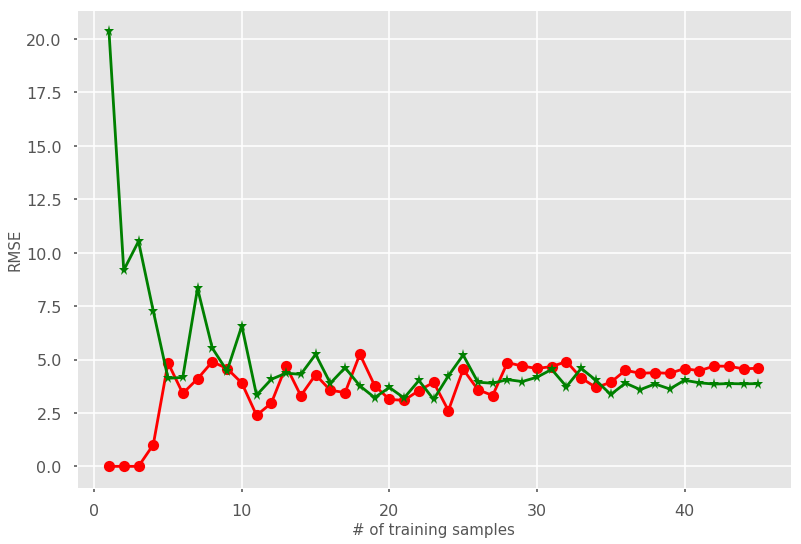

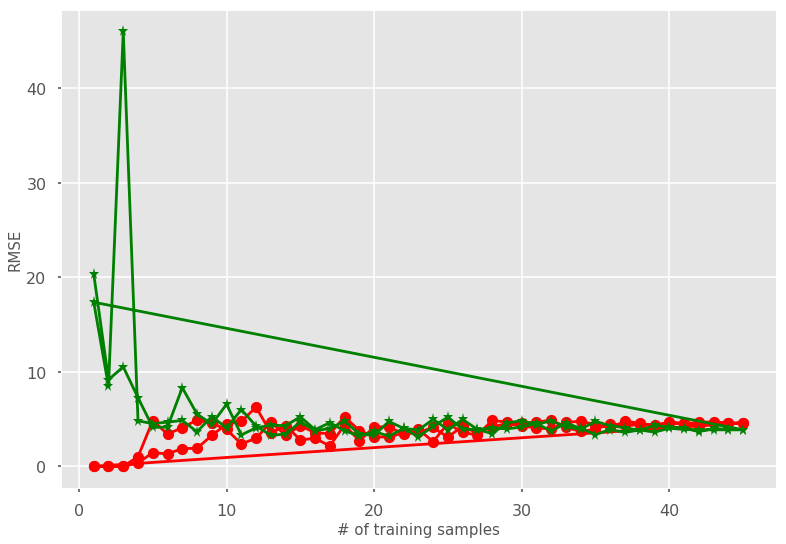

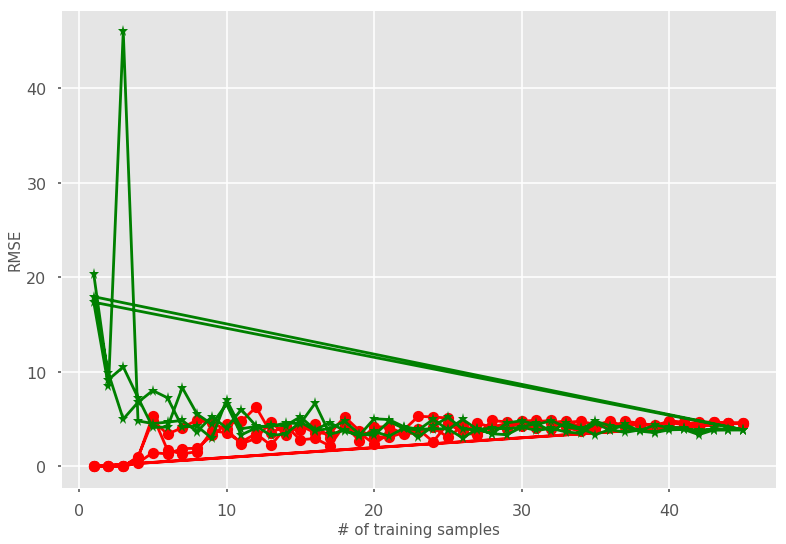

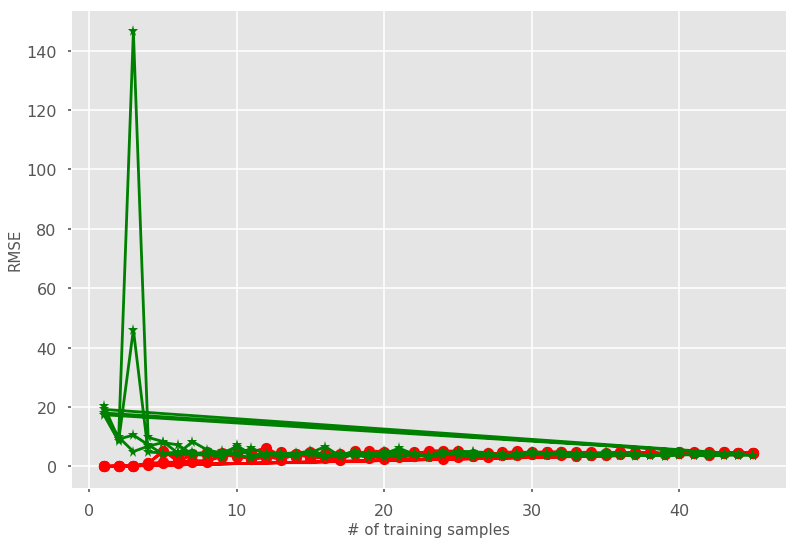

[None, None, None, None]

In [15]:
[gen_test() for n in range(4)]

In [16]:
poly_features = PolynomialFeatures(degree = 2)
test_set_x_poly = poly_features.fit_transform(test_set_x)

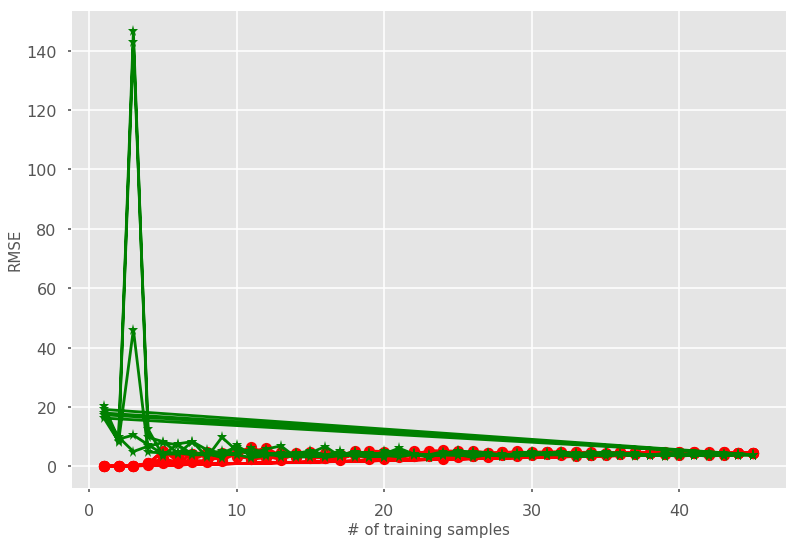

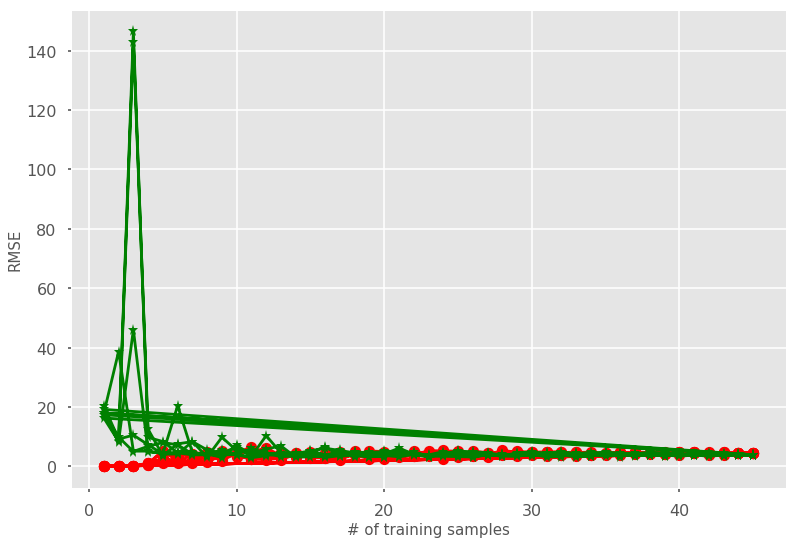

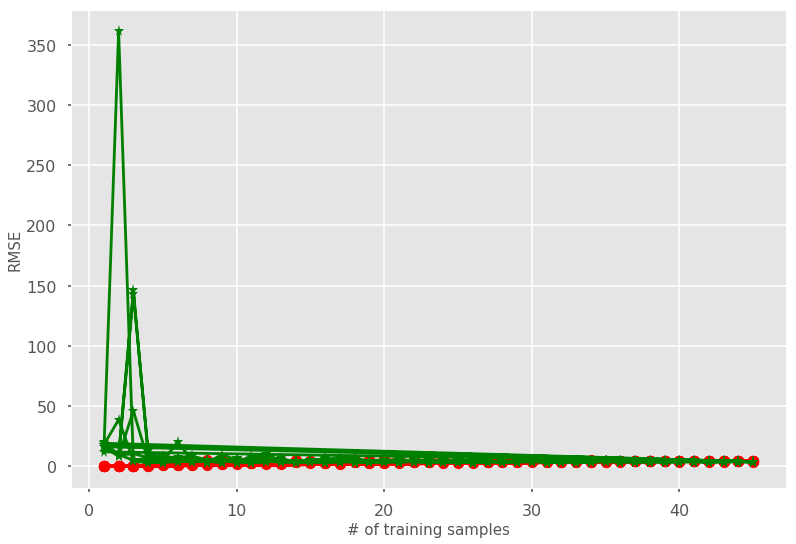

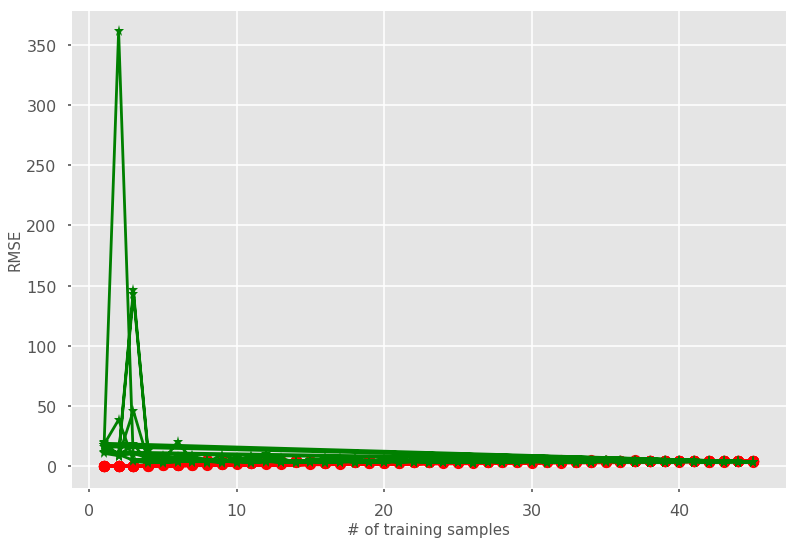

[None, None, None, None]

In [17]:
[gen_test() for n in range(4)]